### importing impotant libraries

In [1]:
#importing impotant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


###  loading data set

In [2]:
# loading data set

Loan_data = pd.read_csv('/home/hrick/Desktop/Training Data.csv')

In [3]:
#get insight of the dataset from head and tail

Loan_data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
Loan_data.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0
251999,252000,9070230,70,17,single,rented,no,Statistician,Avadi,Tamil_Nadu,7,11,0


In [5]:
#dropping unnessery coloum (axis 1)

Loan_data.drop(['Id'],axis = 1,inplace=True)

# display head

Loan_data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [6]:
#Analysis of class label

Classlabel = Loan_data['Risk_Flag']

In [7]:
#classlabel series

Classlabel.head()

0    0
1    0
2    0
3    1
4    1
Name: Risk_Flag, dtype: int64

In [8]:
#total number of Unique class label

label = Classlabel.unique()
label

array([0, 1])

In [9]:
# check any null vallue in class label

Classlabel.isnull().sum()

0

## no null value in class lable

In [10]:
# total numbers of 0s and 1s

data = Classlabel.value_counts()
data

0    221004
1     30996
Name: Risk_Flag, dtype: int64

([<matplotlib.patches.Wedge at 0x7f22fa1c93a0>,
 [Text(-1.2041454366924342, 0.48993241094337386, '0'),
  Text(1.2041454022893443, -0.48993249549854667, '1')])

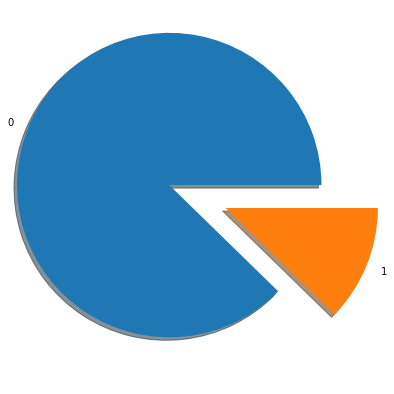

In [11]:
#distribution of the lable   (wether vulnerable or not)

fig = plt.figure(figsize =(10, 7))
explode = [.2,.2]
plt.pie(data, labels = label,explode = explode,shadow=True)

# Describing the statistical inference from the Dataset

In [12]:
#describing the data

Loan_data.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [13]:
# geting its info

Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.1+ MB


# no null value present in the Dataset

In [14]:
#number of catagorical features

catagorical__feature__dataset = Loan_data.drop(['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS'],axis = 1)

In [15]:
# Displaying the catagorical datas

catagorical__feature__dataset.head()

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,Risk_Flag
0,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,0
1,single,rented,no,Software_Developer,Parbhani,Maharashtra,0
2,married,rented,no,Technical_writer,Alappuzha,Kerala,0
3,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,1
4,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,1


In [16]:
#number of numeric  features

numeric__feature__dataset = Loan_data.drop(['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE'],axis = 1)

In [17]:
# displaying the numeric dataset

numeric__feature__dataset.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,3,13,0
1,7574516,40,10,9,13,0
2,3991815,66,4,4,10,0
3,6256451,41,2,2,12,1
4,5768871,47,11,3,14,1


# EDA OF THE CATAGORICAL FEATURES

In [18]:
catagorical__feature__dataset['Married/Single'].unique()

array(['single', 'married'], dtype=object)

In [19]:
catagorical__feature__dataset['House_Ownership'].unique()

array(['rented', 'norent_noown', 'owned'], dtype=object)

In [20]:
catagorical__feature__dataset['Car_Ownership'].unique()

array(['no', 'yes'], dtype=object)

In [21]:
label_prof = catagorical__feature__dataset['Profession'].unique()
label_prof

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

<AxesSubplot:xlabel='Profession', ylabel='Count'>

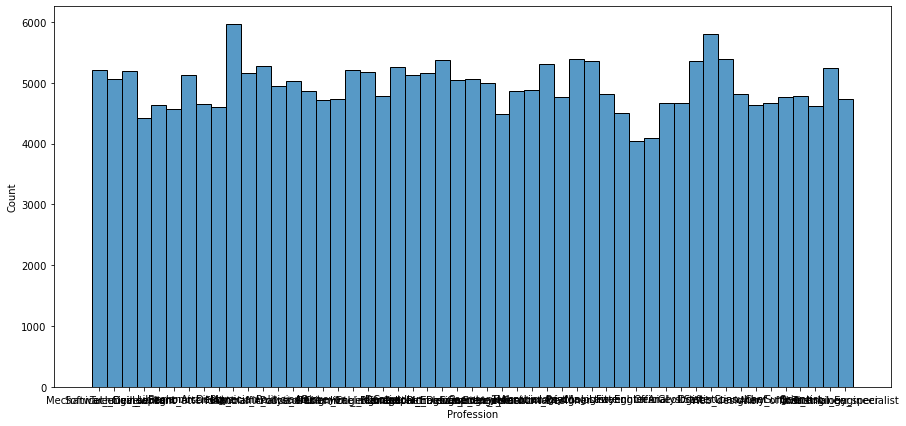

In [22]:

fig = plt.figure(figsize =(15, 7))
sns.histplot(catagorical__feature__dataset['Profession'])


In [23]:
# count of different catagories

data_proff = catagorical__feature__dataset['Profession'].value_counts()
# data

([<matplotlib.patches.Wedge at 0x7f22f933c8e0>,
 [Text(1.096968085449993, 0.08161506909987273, 'Mechanical_engineer'),
  Text(1.0732685872311676, 0.2410280889498434, 'Software_Developer'),
  Text(1.029264472396393, 0.3880910278047854, 'Technical_writer'),
  Text(0.9679393654673121, 0.5225833759111912, 'Civil_servant'),
  Text(0.8893379890190716, 0.6473622952315912, 'Librarian'),
  Text(0.7950459287084591, 0.7601986393332363, 'Economist'),
  Text(0.6867068804737889, 0.859321627977533, 'Flight_attendant'),
  Text(0.5667769659601128, 0.9427427384271115, 'Architect'),
  Text(0.4378064113808191, 1.0091211751587859, 'Designer'),
  Text(0.30181672921421737, 1.0577838446329344, 'Physician'),
  Text(0.1610440544905823, 1.0881474222334189, 'Financial_Analyst'),
  Text(0.018087038733197672, 1.0998512895068424, 'Air_traffic_controller'),
  Text(-0.12456440106890025, 1.0929243843863794, 'Politician'),
  Text(-0.2648232017899788, 1.067646323364486, 'Police_officer'),
  Text(-0.4002917301946477, 1.02

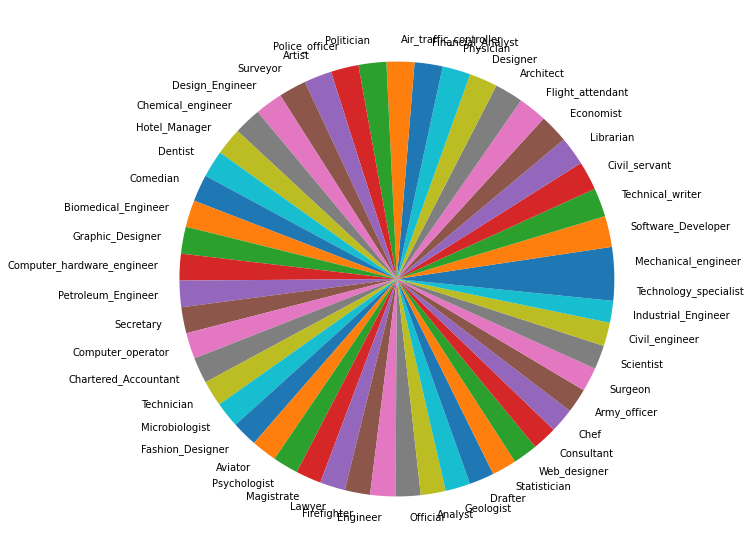

In [24]:
fig = plt.figure(figsize =(18, 10))

plt.pie(data_proff, labels = label_prof)

In [25]:
# total number of unique catagories of proffession

len(catagorical__feature__dataset['Profession'].unique())

51

In [26]:
label_city = catagorical__feature__dataset['CITY'].unique()
label_city

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar',
       'Tiruchirappalli[10]', 'Jalgaon', 'Tiruppur', 'Jamnagar',
       'Kota[6]', 'Karimnagar', 'Hajipur[31]', 'Adoni', 'Erode[17]',
       'Kollam', 'Madurai', 'Anantapuram[24]', 'Kamarhati', 'Bhusawal',
       'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad', 'Ajmer',
       'Ongole', 'Miryalaguda', 'Ambattur', 'Indore', 'Pondicherry',
       'Shimoga', 'Chennai', 'Gulbarga', 'Khammam', 'Saharanpur',
       'Gopalpur', 'Amravati', 'Udupi', 'Howrah', 'Aurangabad[39]',
       'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar', 'Bellary', 'Danapur',
       'Purnia[26]', 'Bijapur', 'Patiala', 'Malda', 'Sagar', 'Durgapur',
       'Junagadh', 'Singrauli', 'Agartala', 'Thanjavur', 'Hindupur',
       'Naihati', 'North_Dumdum', 'Panchkula', 'Anantapur', 'Serampore',
       'Bathinda', 'Nadiad', 'Kanpur', 'Haridwar', 'Berhampur',
       'Jamshedpur', 'Hyderabad', 'Bidar', 'Kottayam', 'Solapur',
       'Suryapet', 'Aizawl', 'Asansol', 'Deoghar'

In [27]:
data_city = catagorical__feature__dataset['CITY'].value_counts()

([<matplotlib.patches.Wedge at 0x7f22f924ae80>,
 [Text(1.0998645110556424, 0.01726433666066239, 'Rewa'),
  Text(1.0988134967104517, 0.05107738684535818, 'Parbhani'),
  Text(1.096801019164574, 0.08383033078517359, 'Alappuzha'),
  Text(1.0938530771381618, 0.11612685148308567, 'Bhubaneswar'),
  Text(1.0899783604485485, 0.14814578547462845, 'Tiruchirappalli[10]'),
  Text(1.085265192544094, 0.17944208495286446, 'Jalgaon'),
  Text(1.0797637279350172, 0.21002450294161923, 'Tiruppur'),
  Text(1.073514421723396, 0.23993079492195782, 'Jamnagar'),
  Text(1.0665444534841468, 0.26922653796051205, 'Kota[6]'),
  Text(1.0587826129392381, 0.29829411415172014, 'Karimnagar'),
  Text(1.0502858047320822, 0.32695523910511487, 'Hajipur[31]'),
  Text(1.041088591240745, 0.35515425548395324, 'Adoni'),
  Text(1.0312155847999227, 0.3828765044577083, 'Erode[17]'),
  Text(1.0206761352088387, 0.41014659210476023, 'Kollam'),
  Text(1.0094320329525814, 0.4370892023937664, 'Madurai'),
  Text(0.9974826595222216, 0.46371

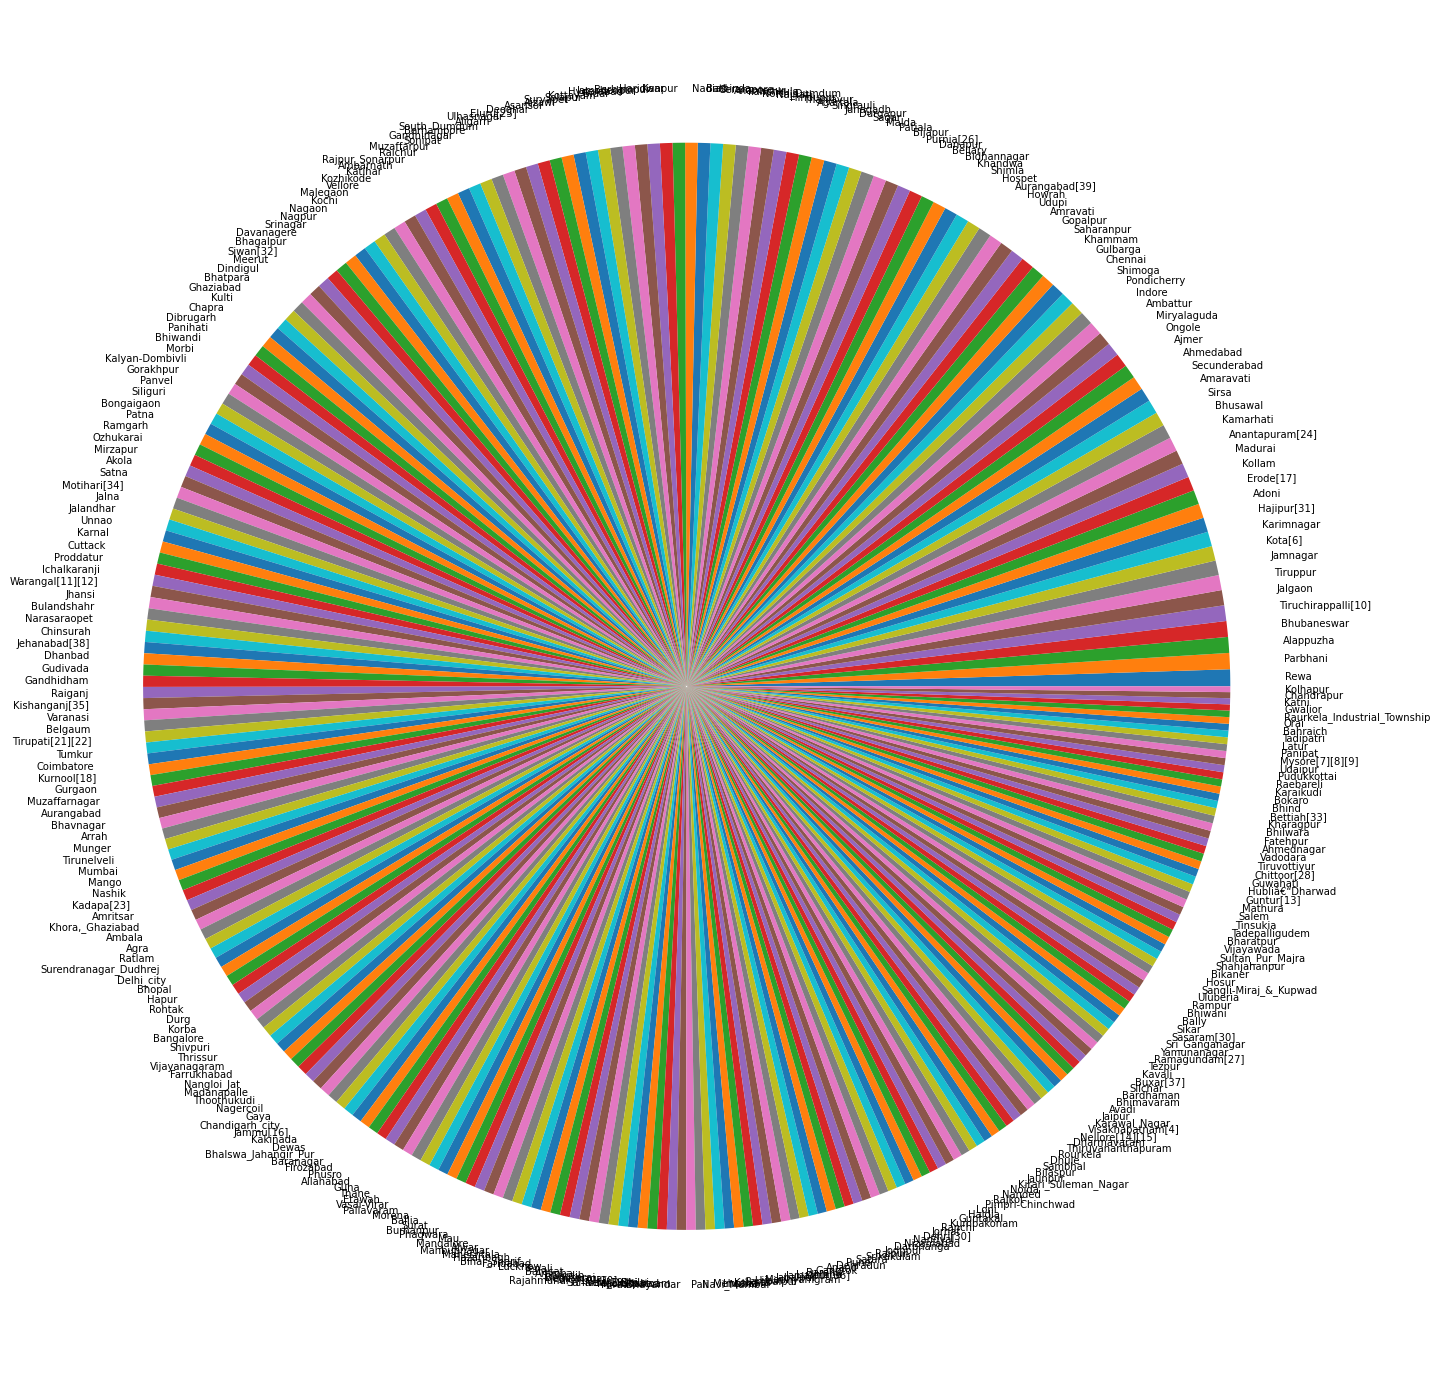

In [28]:
fig = plt.figure(figsize=(30,25))

plt.pie(data_city, labels = label_city)

In [29]:
#total number of unique Catagories of CITY

len(catagorical__feature__dataset['CITY'].unique())

317

In [30]:
label_state = catagorical__feature__dataset['STATE'].unique()
label_state

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

In [54]:
data_state = catagorical__feature__dataset['STATE'].value_counts()
data_state

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: STATE, dtype: int64

([<matplotlib.patches.Wedge at 0x7f22f7cb81c0>,
 [Text(1.0317729477877369, 0.38137197617733276, 'Madhya_Pradesh'),
  Text(0.5693369653201974, 0.9411989268587106, 'Maharashtra'),
  Text(-0.09889008105481087, 1.095545869358729, 'Kerala'),
  Text(-0.7070768876729655, 0.8426400624933001, 'Odisha'),
  Text(-1.0394617494204628, 0.359887859605949, 'Tamil_Nadu'),
  Text(-1.0921626990199051, -0.13107493608450152, 'Gujarat'),
  Text(-0.9644653916107087, -0.5289673982252617, 'Rajasthan'),
  Text(-0.7460058795822262, -0.8083781464319463, 'Telangana'),
  Text(-0.48368678816240807, -0.9879509557448356, 'Bihar'),
  Text(-0.21712734620339424, -1.0783578791526827, 'Andhra_Pradesh'),
  Text(0.030179171256860836, -1.0995859300765216, 'West_Bengal'),
  Text(0.25886956082785983, -1.0691054908084567, 'Haryana'),
  Text(0.4582828797218064, -0.9999884010096759, 'Puducherry'),
  Text(0.6315629746692499, -0.9006265646908982, 'Karnataka'),
  Text(0.7673042312516501, -0.7881904698125412, 'Uttar_Pradesh'),
  Text(

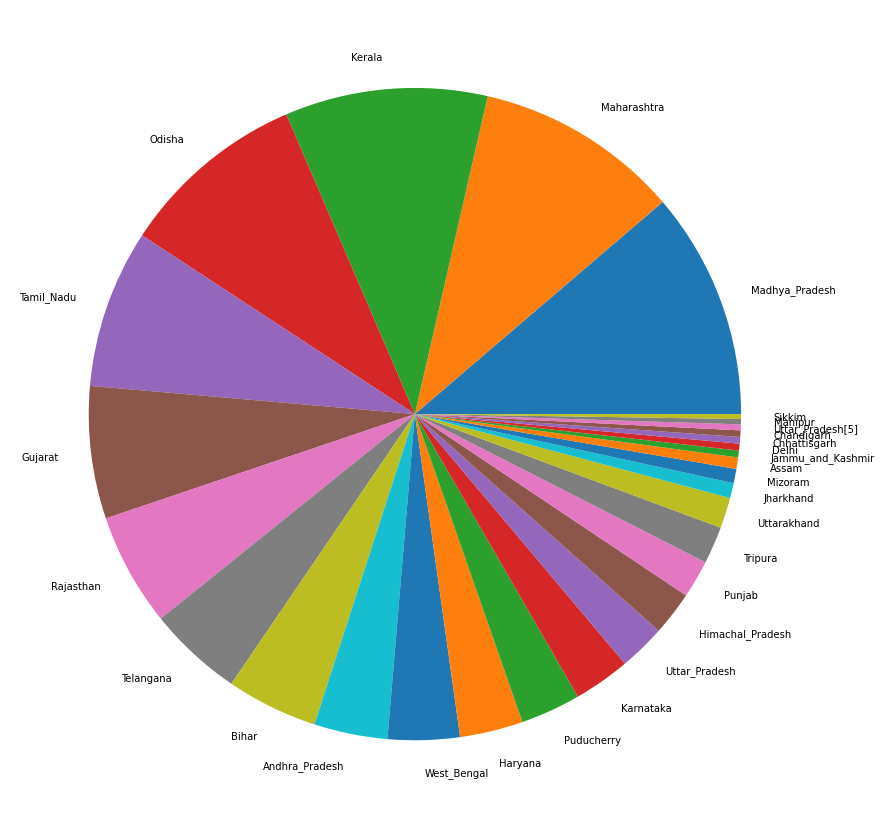

In [32]:
fig = plt.figure(figsize=(25,15))

plt.pie(data_state, labels = label_state)

In [33]:
#total number of unique Catagories of STATE

len(catagorical__feature__dataset['STATE'].unique())

29

# EDA OF NUMERIC FEATURES

### histogram for all features to get the idea of their distribution

In [34]:
numeric__feature__dataset.columns

Index(['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS',
       'Risk_Flag'],
      dtype='object')

In [35]:
numeric__feature__dataset['Income'].describe()

count    2.520000e+05
mean     4.997117e+06
std      2.878311e+06
min      1.031000e+04
25%      2.503015e+06
50%      5.000694e+06
75%      7.477502e+06
max      9.999938e+06
Name: Income, dtype: float64

<AxesSubplot:xlabel='Income', ylabel='Count'>

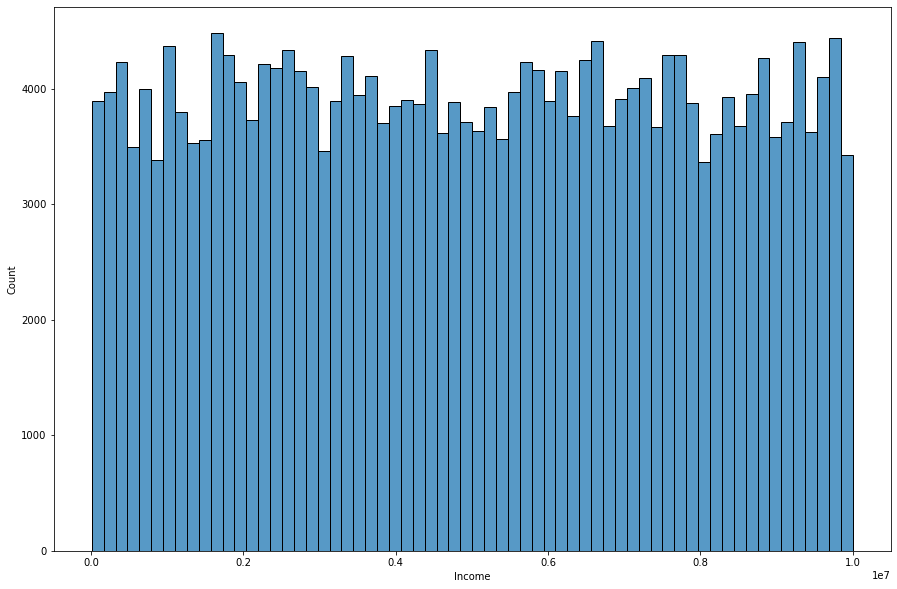

In [36]:
fig = plt.figure(figsize=(15,10))

sns.histplot(numeric__feature__dataset['Income'])

## why such histplot for the Age

In [37]:
numeric__feature__dataset['Age'].describe()

count    252000.000000
mean         49.954071
std          17.063855
min          21.000000
25%          35.000000
50%          50.000000
75%          65.000000
max          79.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

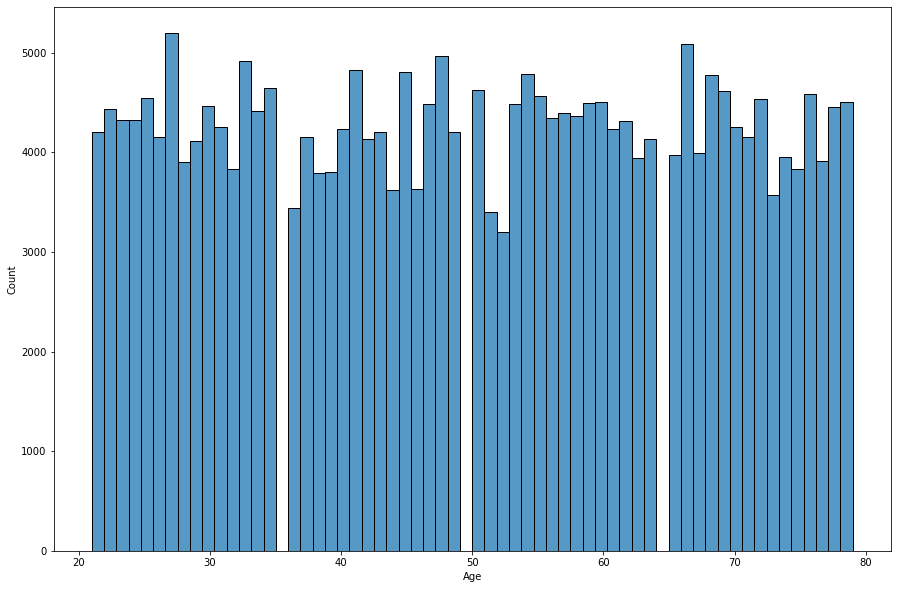

In [38]:
fig = plt.figure(figsize=(15,10))

sns.histplot(numeric__feature__dataset['Age'])

In [39]:
numeric__feature__dataset['Experience'].describe()

count    252000.000000
mean         10.084437
std           6.002590
min           0.000000
25%           5.000000
50%          10.000000
75%          15.000000
max          20.000000
Name: Experience, dtype: float64

<AxesSubplot:xlabel='Experience', ylabel='Count'>

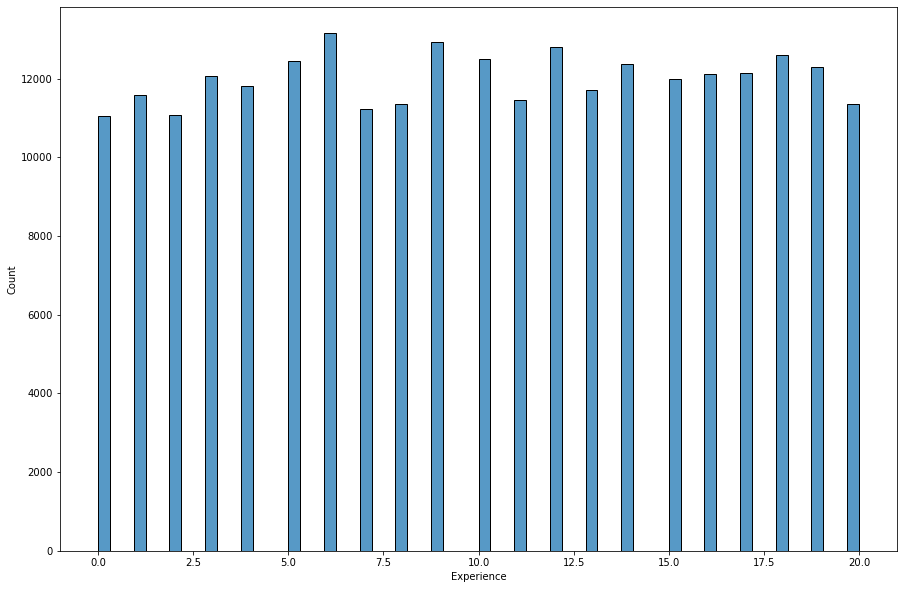

In [40]:
fig = plt.figure(figsize=(15,10))



sns.histplot(numeric__feature__dataset['Experience'])

In [41]:
numeric__feature__dataset['CURRENT_HOUSE_YRS'].describe()

count    252000.000000
mean         11.997794
std           1.399037
min          10.000000
25%          11.000000
50%          12.000000
75%          13.000000
max          14.000000
Name: CURRENT_HOUSE_YRS, dtype: float64

In [42]:
fig = plt.figure(figsize=(15,10))

#needed to reshape the column

print(numeric__feature__dataset['CURRENT_HOUSE_YRS'].shape)

buff = numeric__feature__dataset['CURRENT_HOUSE_YRS']

buff2 = buff.values.reshape(252000,1)

(252000,)


<Figure size 1080x720 with 0 Axes>

<AxesSubplot:ylabel='Count'>

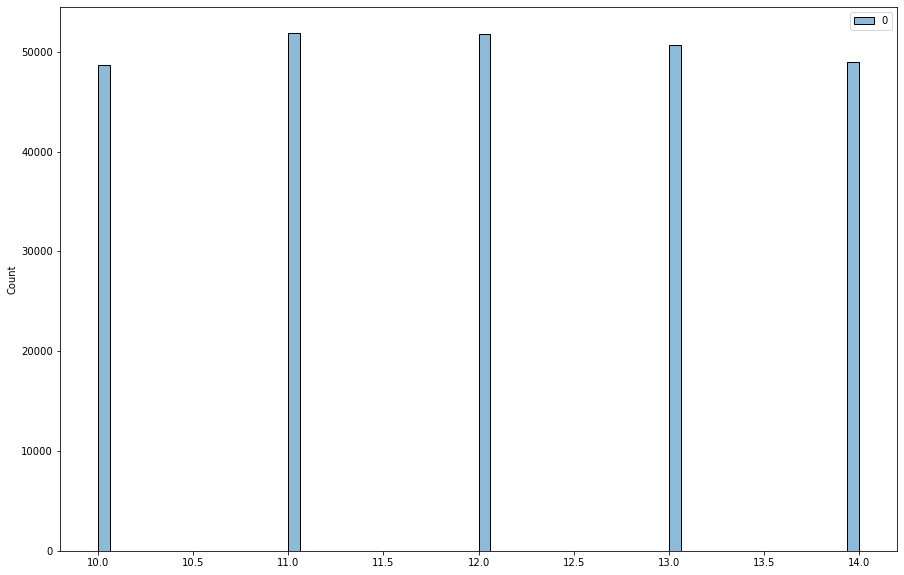

In [43]:
fig = plt.figure(figsize=(15,10))


sns.histplot(buff2)

In [44]:
numeric__feature__dataset['CURRENT_JOB_YRS'].describe()

count    252000.000000
mean          6.333877
std           3.647053
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          14.000000
Name: CURRENT_JOB_YRS, dtype: float64

<AxesSubplot:xlabel='CURRENT_JOB_YRS', ylabel='Count'>

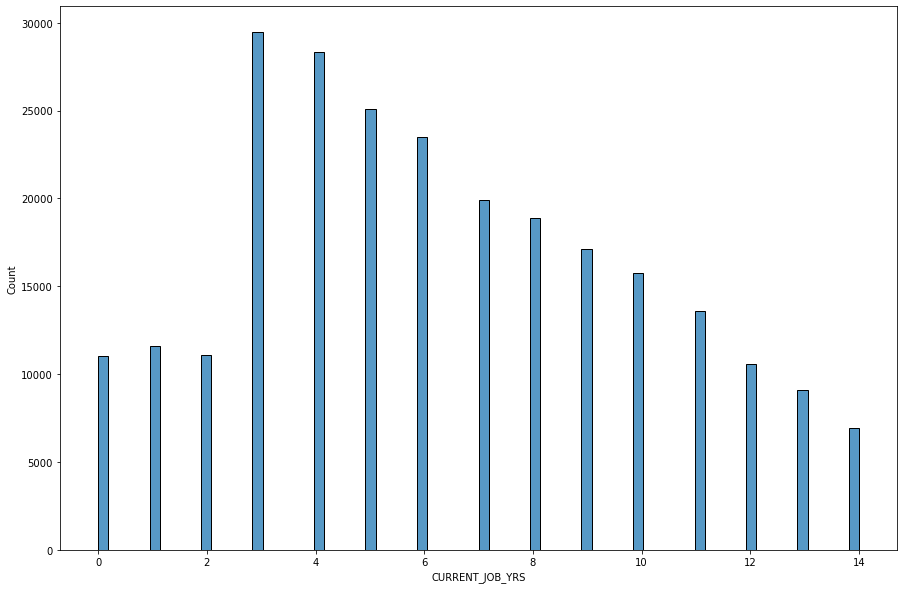

In [45]:
fig = plt.figure(figsize=(15,10))

sns.histplot(numeric__feature__dataset['CURRENT_JOB_YRS'])

# looking for outliners with boxplots

<AxesSubplot:>

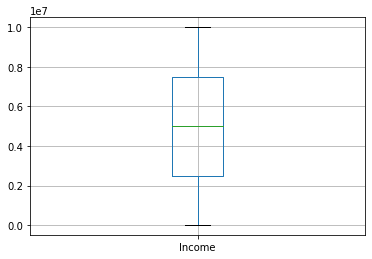

In [46]:
numeric__feature__dataset.boxplot(column=['Income'])

# Income Boxplot

<AxesSubplot:>

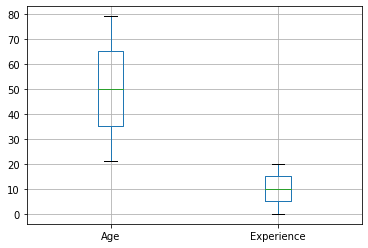

In [47]:
# Age and Experiance Boxplot

numeric__feature__dataset.boxplot(column=['Age','Experience'])

<AxesSubplot:>

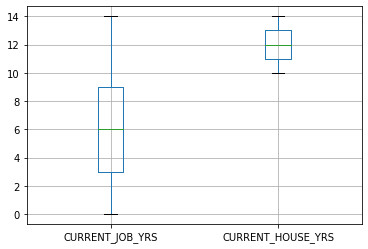

In [48]:
# Current job years and corrent house years boxplots

numeric__feature__dataset.boxplot(column=['CURRENT_JOB_YRS','CURRENT_HOUSE_YRS'])

# EDA Relation with label and coorelation

## pairplot

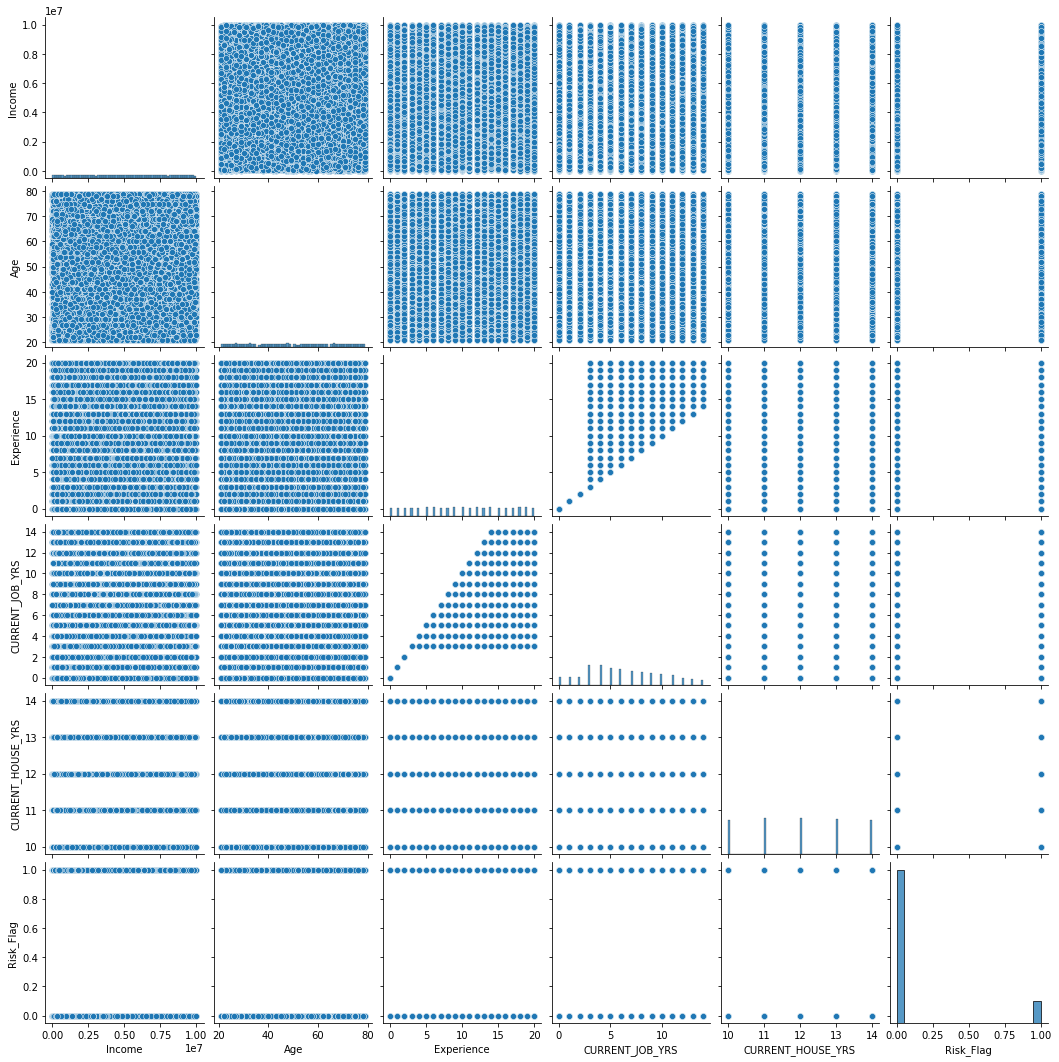

In [49]:
sns.pairplot(Loan_data)

In [50]:
Loan_data.corr()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Income,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
Age,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
Experience,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
CURRENT_JOB_YRS,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
CURRENT_HOUSE_YRS,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
Risk_Flag,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


### 

Coefficient of Variation

The coefficient of variation is a measure of variance that can be used to compare a data distribution that has different units.

    The higher the Coefficient of Variation = the wider the data you have compared to the average data (more difficult to predict).
    The Lower Coefficient of Variation = The narrower the data you have compared to the Average data (Easier to predict).



In [51]:

covRiskFlag = ((Loan_data['Risk_Flag'].std()/Loan_data['Risk_Flag'].mean()) * 100)
print(f'Coefficient Of Variation Potability : {covRiskFlag}%')

Coefficient Of Variation Potability : 267.02265062872186%


<AxesSubplot:>

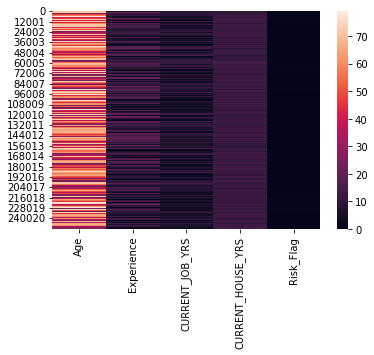

In [52]:
buff3 = numeric__feature__dataset.drop(['Income'],axis = 1)

#without age heatmap

sns.heatmap(buff3)

<AxesSubplot:>

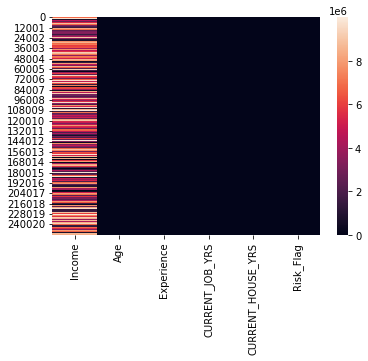

In [53]:
#all numeric feature heatmap

#not much infpo gathered

sns.heatmap(numeric__feature__dataset)